<H1 span style="font-family:garamond; font-size:4em; text-align:center; color:#CB5C29">WELCOME HOME REALTY</H1>

<H2 span style="font-family:garamond; font-size:3em; text-align:center; color:#CB5C29">Listing Price Calculator</H2>

<H3 span style="font-family:garamond; font-size:2em; text-align:center; color:#76424D">Please input the following information to produce a predicted listing price:</H3>

In [1]:
# Imports

# User Interface
from ipywidgets import widgets  
from IPython.display import display, clear_output
from IPython.display import Markdown as md

# Data Visual Themes
import seaborn as sns
sns.set_theme(palette="flare")

# Utility Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration
from sklearn.feature_selection import mutual_info_regression
from scipy import stats

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Model Scoring
from sklearn.metrics import mean_absolute_error, r2_score

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create Form Input Boxes
bed = widgets.Text(description = "Bedrooms")
bath = widgets.Text(description = "Bathrooms")
acre = widgets.Text(description = "Acres")
zip_code = widgets.Text(description = "Zip Code")
house_size = widgets.Text(description = "House Sqft")


# Create Button
submit_button = widgets.Button(
    description='Predict Price',
    disabled=False,
    button_style='success',
    tooltip='Get Predicted Listing Price',
    icon='check'
)

result = widgets.Output()

In [3]:
# Run Prediction Once Button is Clicked
def on_button_clicked(b):
    with result:
        clear_output()
        predict_listing_price()

submit_button.on_click(on_button_clicked)

In [4]:
# Prediction Function
def predict_listing_price():
    
    # Gather Form Inputs
    bed_val = bed.value
    bath_val = bath.value
    acre_val = acre.value
    zip_code_val = zip_code.value
    house_size_val = house_size.value    
    
    # Print Submited Results
    print("For a Home with the Following Values:")
    print("Bed:", bed_val)
    print("Bath:", bath_val)
    print("Acres:", acre_val)
    print("Zip Code:", zip_code_val)
    print("House Size in Square Feet:", house_size_val)
    
    # Create Dataframe From Input
    df_pred = pd.DataFrame([pd.Series([bed_val, bath_val, acre_val, zip_code_val, house_size_val])])

    # Run Through Prediction Model
    prediction = model.predict(df_pred)
    pred_int = int(prediction)
    
    # Print the Prediction
    print()
    print(f'The Predicted Price of Your Listing Is: ${pred_int:.2f}')
    
    # Adding and Subtracting Mean Absolute Value
    over_pred = pred_int + mae
    under_pred = pred_int - mae
    print()
    print(f'As Our Current Mean Absolute Error Is: ${mae:.2f},')
    print(f'We Would Suggest a Listing Price Range of: ${under_pred:.2f}-${over_pred:.2f}')

In [5]:
# Display Form
display(bed, bath, acre, zip_code, house_size)
print()

# Display the Submit Button
display(submit_button, result)

Text(value='', description='Bedrooms')

Text(value='', description='Bathrooms')

Text(value='', description='Acres')

Text(value='', description='Zip Code')

Text(value='', description='House Sqft')

Button(button_style='success', description='Predict Price', icon='check', style=ButtonStyle(), tooltip='Get Pr…

Output()

<hr style="border:2px solid; color:#CB5C29">

<H2 span style="font-family:garamond; font-size:3em; text-align:center; color:#CB5C29">Frequently Asked Questions</H2>

<H3 span style="font-family:garamond; font-size:2.5em; text-align:center; color:#CB5C29">How up to date is the data?</H3>

<p span style="font-family:garamond; font-size:22px; text-align:left; color:#76424D">We pull data from the <a href = "https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset">USA Real Estate Dataset</a> hosted on <a href = "https://www.kaggle.com/">Kaggle.com</a>, which is updated weekly from data pulled from <a href = "https://www.realtor.com/">Realtor.com</a>.</p>

<p span style="font-family:garamond; font-size:22px; text-align:left; color:#76424D">Below is a preview of the data pulled most recently:</p>

In [6]:
# Create Dataframe & Get Starting Length
df = pd.read_csv('Static/cleaned-data.csv')
starting_length = len(df)

In [7]:
# Print First 5 Data Entries
df

,price,bed,bath,acre_lot,zip_code,house_size,year,month
0,289000.0,1.0,1.0,0.13,7866.0,915.0,2000,1
1,425000.0,3.0,2.0,0.31,8816.0,1336.0,2000,1
2,289000.0,1.0,1.0,0.13,7866.0,915.0,2000,1
3,289000.0,1.0,1.0,0.13,7866.0,915.0,2000,1
4,949900.0,5.0,5.0,5.04,7830.0,4508.0,2000,1
...,...,...,...,...,...,...,...,...
41311,753750.0,3.0,2.0,1.00,8210.0,2188.0,2022,9
41312,1985000.0,5.0,4.0,0.22,8204.0,2576.0,2022,10
41313,1985000.0,5.0,4.0,0.22,8204.0,2576.0,2022,10
41314,720900.0,3.0,2.0,1.00,8210.0,2188.0,2022,10


In [8]:
# Print Starting Length of DataFrame
print("There are a total of", starting_length, "entries!")

There are a total of 41316 entries!


<hr style="border:2px solid; color:#CB5C29">

<H1>Experimenting</H1>

In [9]:
df_yearly_averages = df.groupby(['year'])['price'].mean()

In [10]:
df_yearly_averages.head()

year
2000    536337.725191
2001    540842.936433
2002    519026.794737
2003    487765.600297
2004    445109.712963
Name: price, dtype: float64

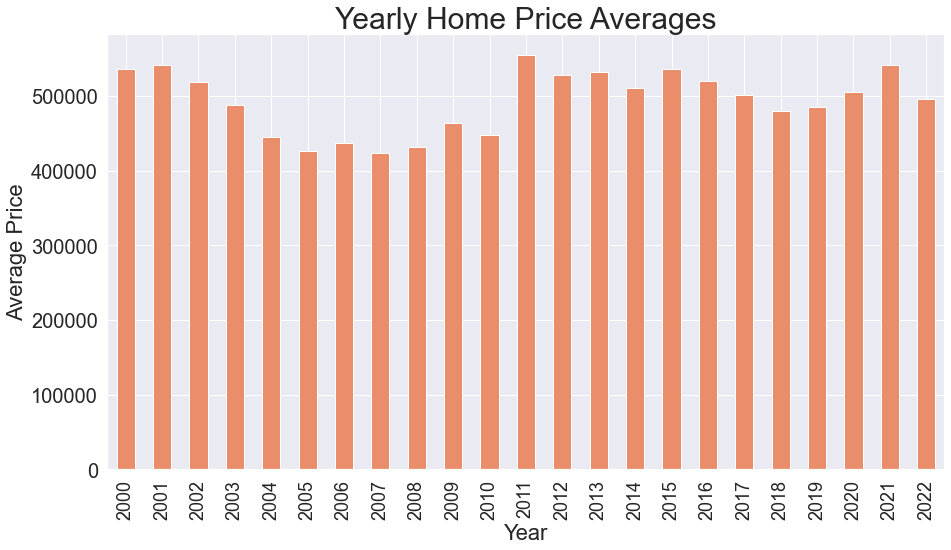

In [11]:
df_yearly_averages.plot(kind="bar", figsize=(15,8))

plt.title("Yearly Home Price Averages", fontsize=30)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel("Year", fontsize=22)
plt.ylabel("Average Price", fontsize = 22);

In [12]:
df_monthly_averages = df.groupby(['month'])['price'].mean()

In [13]:
df_monthly_averages = pd.DataFrame(df_monthly_averages)

In [14]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [15]:
df_monthly_averages.insert(1, "months", months, True)

In [16]:
df_monthly_averages

,price,months
month,,
1,484128.312379,January
2,451101.484121,February
3,503576.713505,March
4,474135.568580,April
5,495480.321032,May
6,516982.383478,June
7,490516.554871,July
8,511675.523458,August
9,500667.929298,September


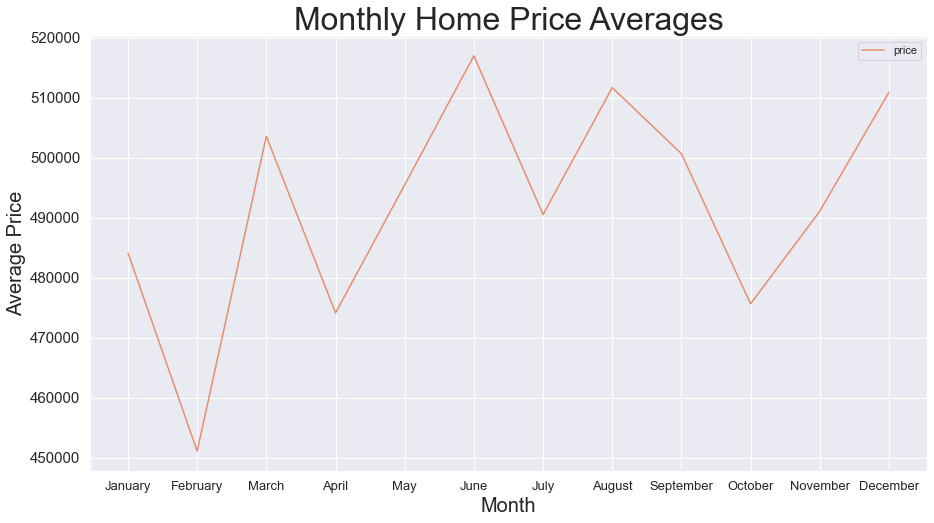

In [17]:
df_monthly_averages.plot(kind="line", figsize=(15,8))

plt.title("Monthly Home Price Averages", fontsize=32)
plt.xticks(df_monthly_averages.index, df_monthly_averages.months, fontsize = 13)
plt.yticks(fontsize = 15)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Average Price", fontsize = 20);

<hr style="border:2px solid; color:#CB5C29">

<H3 span style="font-family:garamond; font-size:2.5em; text-align:center; color:#CB5C29">How do we predict the price?</H3>

<p span style="font-family:garamond; font-size:22px; text-align:left; color:#76424D">We take many steps to create a highly accurate price prediction for your listings:</p>

<ol span style="font-family:garamond; font-size:18px; color:#76424D">
    <li>Create Dataframe From Weekly Updated Data</li>
    <li>Clean Data By Removing Unecessary Features and Missing Data</li>
    <li>Select Most Important Features That Affect Price</li>
    <li>Remove Outliers That Can Skew Results</li>
    <li>Train the Predictor Model to 80% of the Remaining Data</li>
    <li>Test the Other 20% of Data Through Predictor for Accuracy</li>
    <li>Allow You to Input Information to Create a Prediction</li>
</ol>

<hr style="border:2px solid; color:#CB5C29">

<H3 span style="font-family:garamond; font-size:2.5em; text-align:center; color:#CB5C29">What affects listing prices?</H3>

<p span style="font-family:garamond; font-size:22px; text-align:left; color:#76424D">We run the data through various testing to see the factors that are most likely to affect the price of the listings. <br>
    <br>See below graph to show the different features of a home that most affect its pricing:</p>

In [18]:
# Set Up X & Y
X = df.drop(["price", "year", "month"], axis=1)
y = df["price"]

In [19]:
# Get Mutual Information Score
def get_mi_score(X,y):
    X = X
    disc_feat = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mut_info_score = mutual_info_regression(X,y,discrete_features=disc_feat, random_state=42)
    mut_info_score = pd.Series(mut_info_score,name="Mutual Information Score",index=X.columns)
    mut_info_score = mut_info_score.sort_values(ascending=False)
    return mut_info_score

mut_info_score = get_mi_score(X,y)

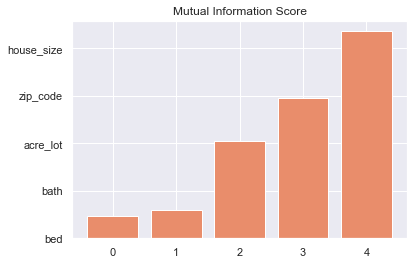

In [20]:
# Plot the Mutual Information Score
def plot_score(score):
    score = score.sort_values(ascending = True)
    height = np.arange(len(score))
    ticks = list(score.index)
    plt.bar(height,score)
    plt.yticks(height,ticks)
    plt.title('Mutual Information Score')

plot_score(mut_info_score)

<p span style="font-family:garamond; font-size:22px; text-align:left; color:#76424D">The above graph displays the mutual information score between the features of a home and the price. <br>
<br>The higher the mutual information score, the more dependent on the feature the price is. <br>
    Therefore, the house size and zip code have the highest impact on the price whereas the number of bedrooms and affect price the least.</p>

<hr style="border:2px solid; color:#CB5C29">

<H3 span style="font-family:garamond; font-size:2.5em; text-align:center; color:#CB5C29">How accurate are the pricing predictions?</H3>

<p span style="font-family:garamond; font-size:22px; text-align:left; color:#76424D">By reducing the unnecessary features and missing data, we have increased the prediction's accuracy. <br>
    <br>In addition to these steps, we will also run a "Z-Score" test and remove any outliers outside of a given threshold to remove any items that could skew the results.</p>
<hr>

<H2 span style="font-family:garamond; font-size:2em; text-align:center; color:#CB5C29">Running the Data Through the Predictor</H2>

<p span style="font-family:garamond; font-size:22px; text-align:left; color:#76424D">After cleaning the data, we are finally ready to run the data through our model to "train" it to make accurate predictions.</p>

In [21]:
# Set X & y
X = df.drop(["price","year","month"], axis = 1)
y = df["price"]

# Set X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Set Random Seed
np.random.seed(42)

# Create and Fit Model
model = RandomForestRegressor()
model.fit(X_train.values, y_train)

# Test Model
model_pred = model.predict(X_test)

# Get Test Scores
mae = mean_absolute_error(y_test, model_pred)
r2 = r2_score(y_test, model_pred)
r2_percent = r2*100

<hr>

<H2 span style="font-family:garamond; font-size:2em; text-align:center; color:#CB5C29">Final Accuracy Score Results</H2>

<p span style="font-family:garamond; font-size:22px; text-align:left; color:#76424D">Below is the accuracy score for today's listing price predictor:</p>

In [22]:
# Print Prediction Accuracy
print(f"The accuracy of this listing price predictor is: {r2_percent:.2f}%")
print(f"On average, this listing price predictor is $ {mae:.2f} off of any given price.")

The accuracy of this listing price predictor is: 98.43%
On average, this listing price predictor is $ 10097.84 off of any given price.


<p span style="font-family:garamond; font-size:22px; text-align:left; color:#76424D">We run our prediction model at an average accuracy of at least 98% percent!</p>

<hr style="border:2px solid; color:#CB5C29">